In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

## Interactive Visualizations

In [4]:
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff

### Data Loading

In [5]:
df = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\MachineLearning\Amaresh sir\Clustering\Mall_Customers_data.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
# Visualize the data using plotly

data = ff.create_table(df.head())
py.iplot(data)

In [10]:
data = ff.create_table(df.describe())
py.iplot(data)

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## EDA

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


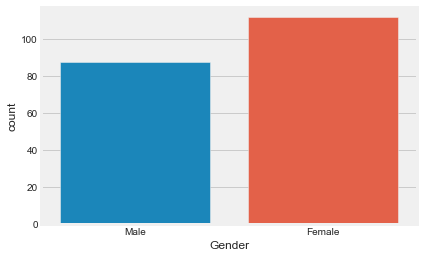

In [14]:
sns.countplot(df.Gender);

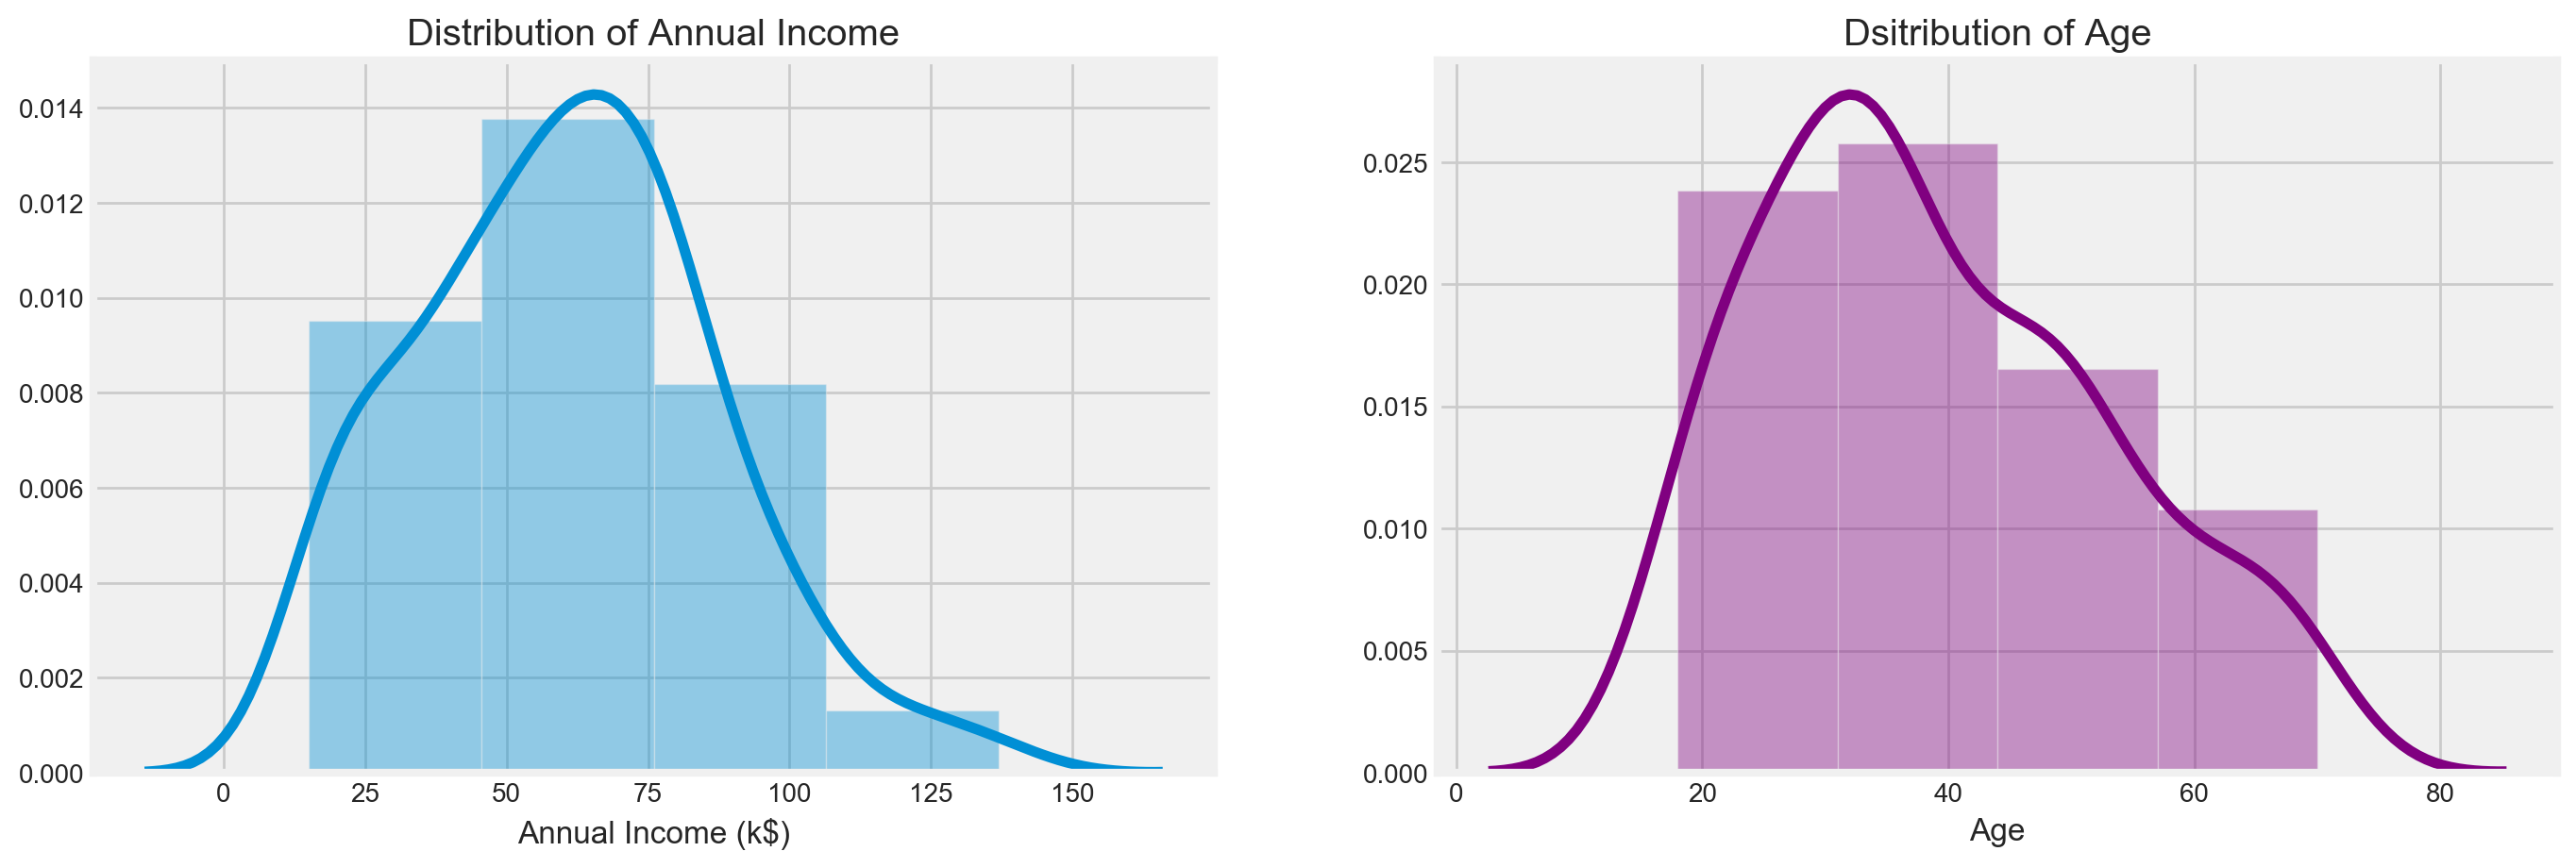

In [15]:
plt.figure(figsize=(15,5), dpi = 200)

plt.subplot(121)
sns.distplot(df['Annual Income (k$)'], bins = 4)
plt.title("Distribution of Annual Income")

plt.subplot(122)
sns.distplot(df['Age'], color = 'purple', bins = 4)
plt.title("Dsitribution of Age")

plt.show();

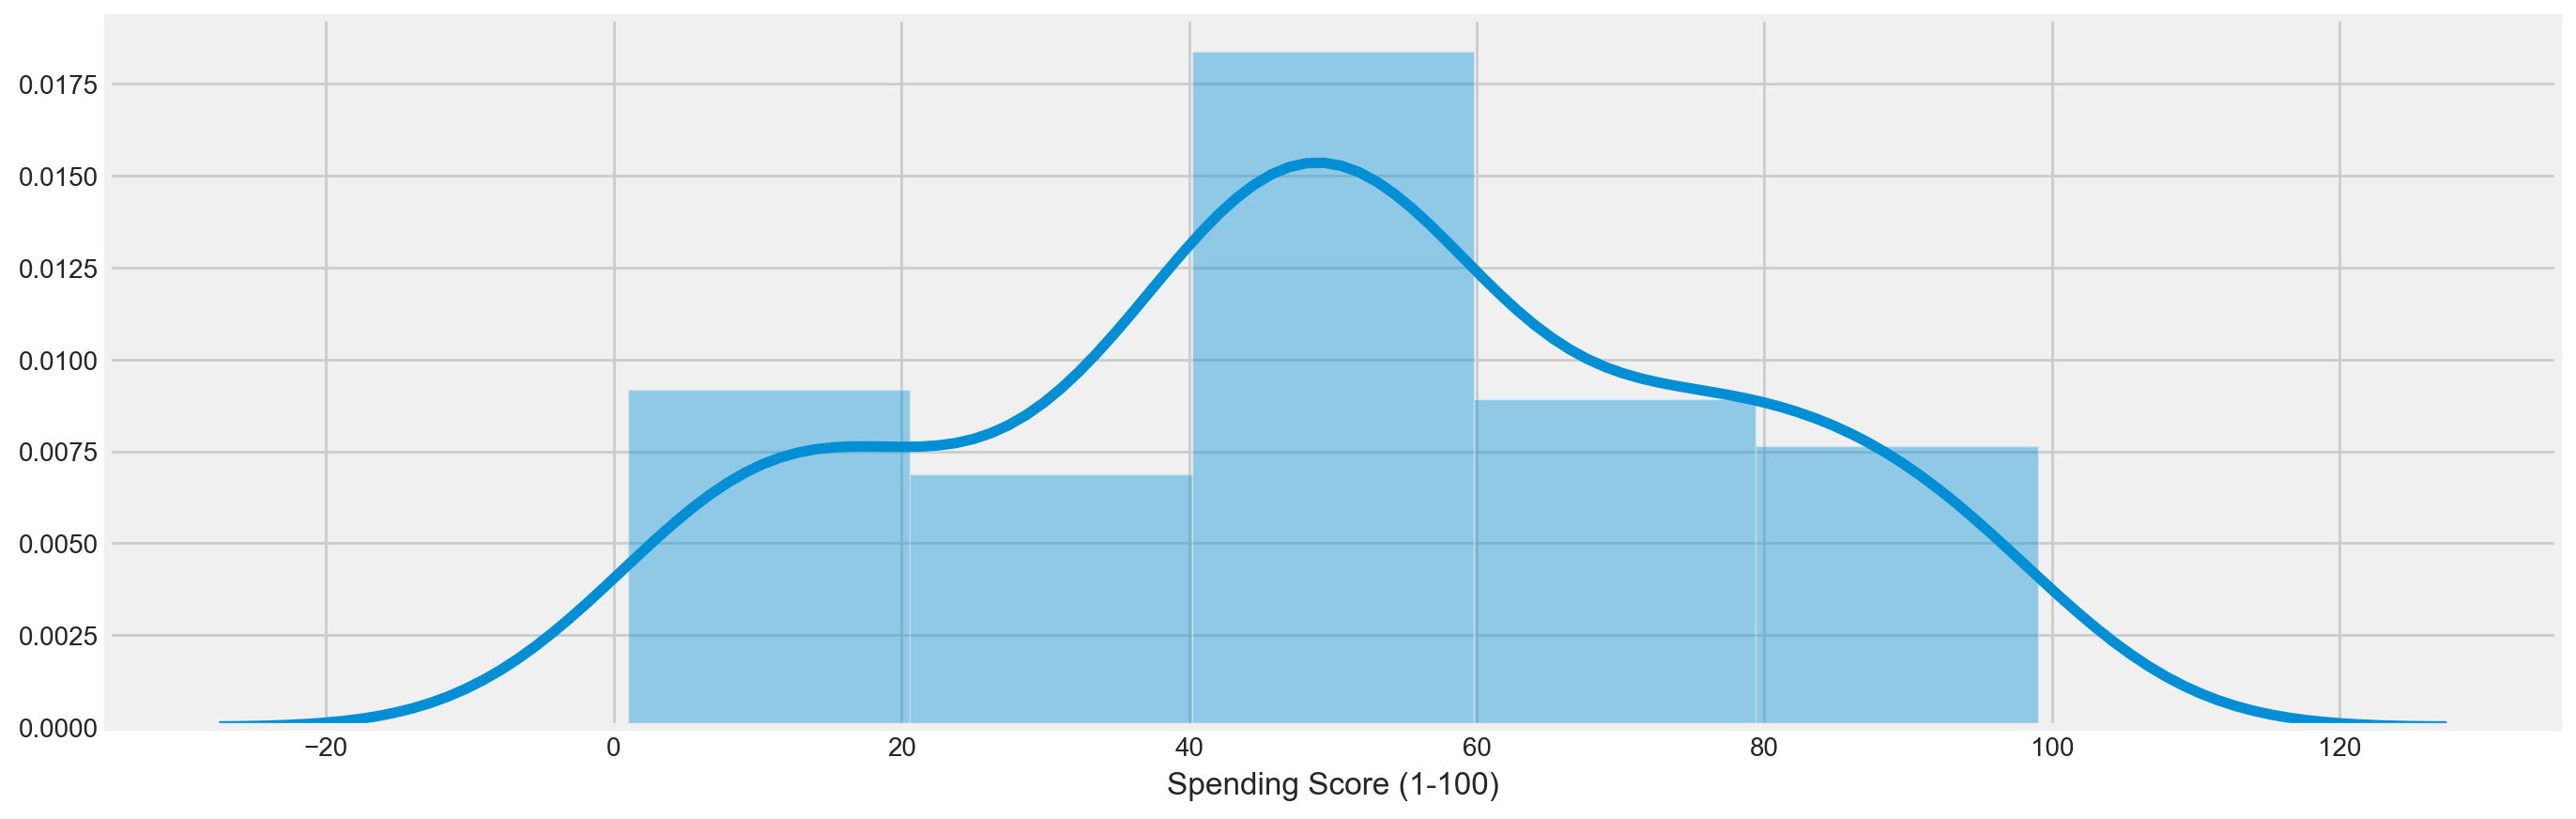

In [16]:
plt.figure(figsize = (15,5), dpi = 200)

sns.distplot(df['Spending Score (1-100)'], bins =5)

plt.show();

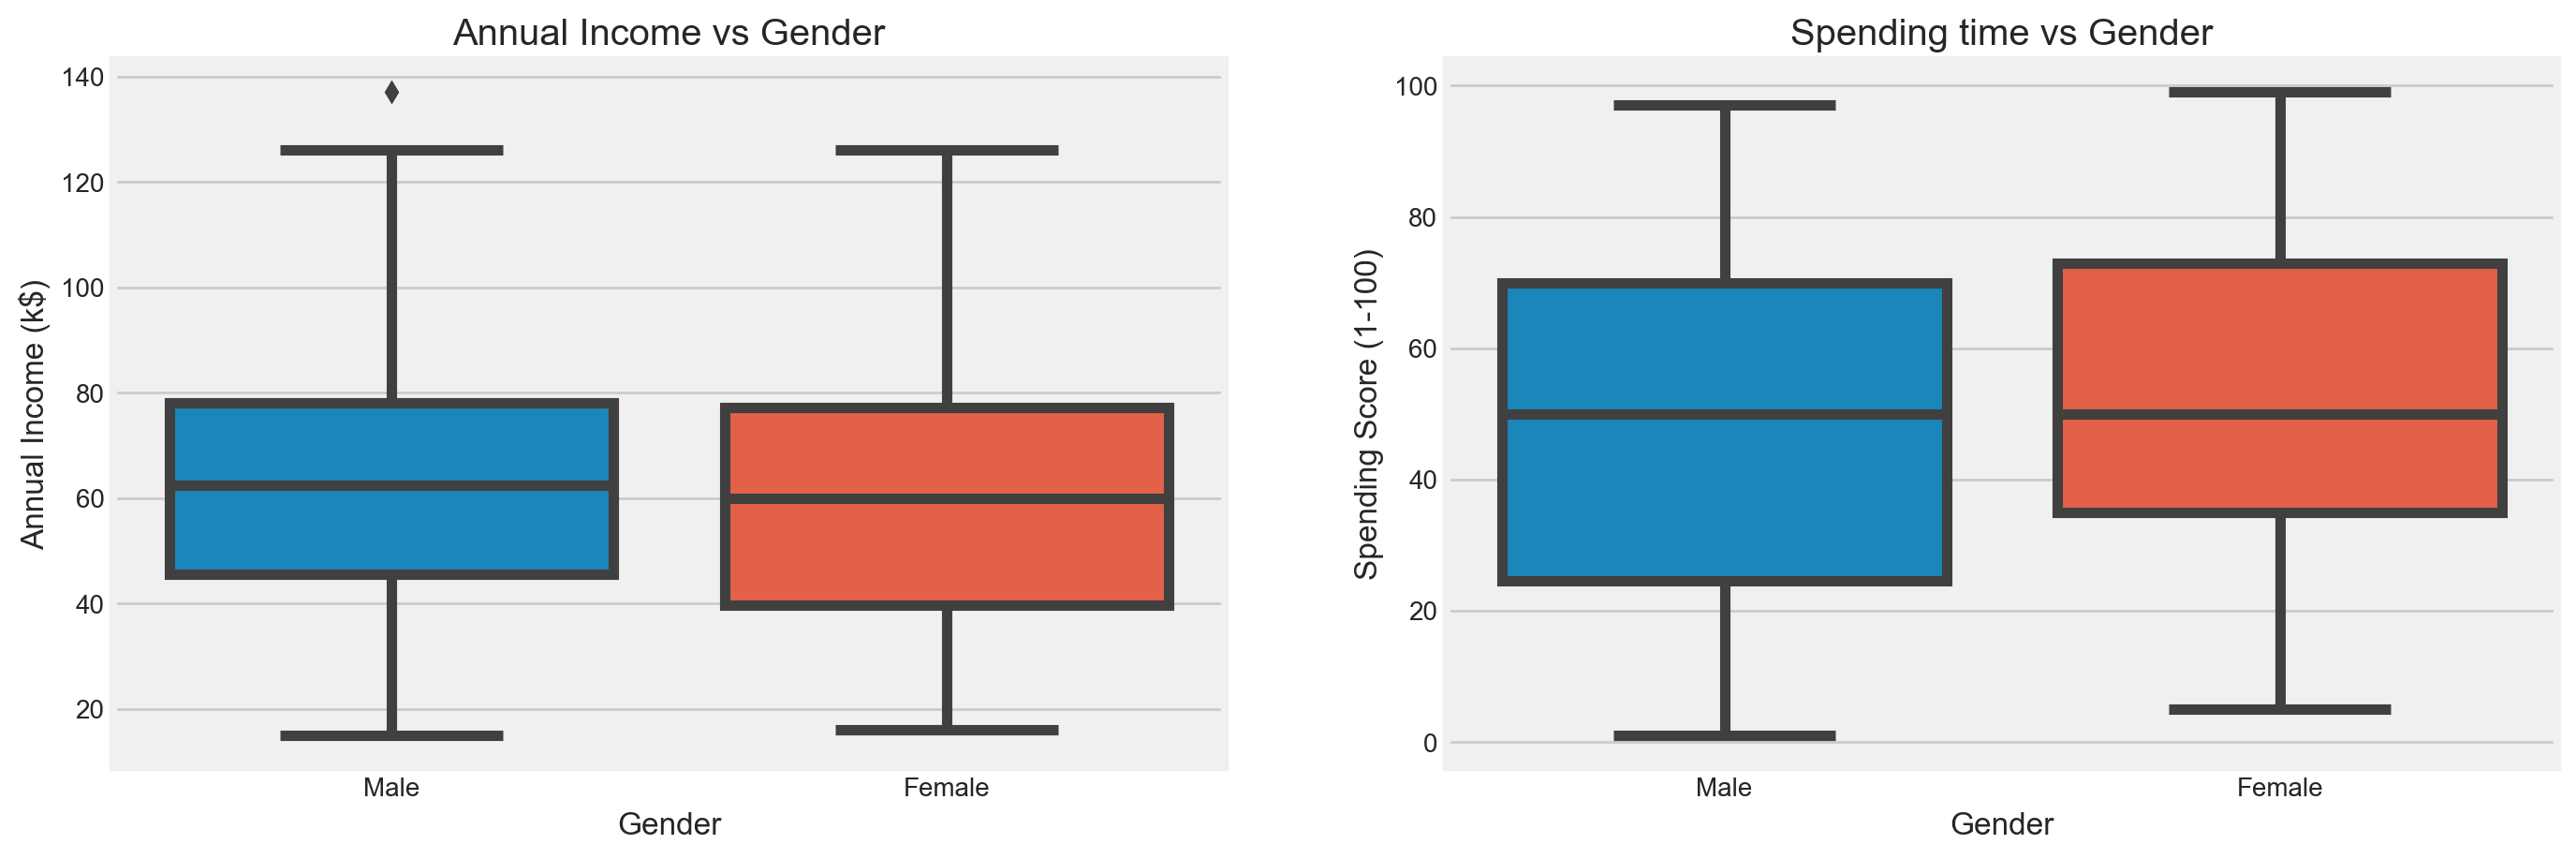

In [17]:
plt.figure(figsize=(15,5), dpi = 200)

plt.subplot(121)
sns.boxplot(y = df['Annual Income (k$)'], x = df['Gender'])
plt.title('Annual Income vs Gender')

plt.subplot(122)
sns.boxplot(y = df['Spending Score (1-100)'], x = df['Gender'])
plt.title('Spending time vs Gender')

plt.show();

# K Means Clustering

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df.iloc[:,[3,4]].head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [20]:
x = df.iloc[:,[3,4]].values

## Basic model selecting k value randomly

In [21]:
from sklearn.cluster import KMeans

In [22]:
km = KMeans(n_clusters = 4, random_state = 101)

In [23]:
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=101, tol=0.0001, verbose=0)

In [24]:
np.round(km.cluster_centers_)

array([[48., 56.],
       [87., 19.],
       [26., 21.],
       [87., 82.]])

In [25]:
df.shape

(200, 5)

In [26]:
km.predict(x)

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [27]:
km.labels_

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [28]:
df['Cluster'] = km.labels_

In [29]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,0
2,3,Female,20,16,6,2
3,4,Female,23,16,77,0
4,5,Female,31,17,40,2


In [30]:
df[df.Cluster == 0].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
1,2,Male,21,15,81,0
3,4,Female,23,16,77,0
5,6,Female,22,17,76,0
7,8,Female,23,18,94,0
9,10,Female,30,19,72,0


In [31]:
df[df.Cluster == 3].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,3
125,126,Female,31,70,77,3
127,128,Male,40,71,95,3
129,130,Male,38,71,75,3
131,132,Male,39,71,75,3


## Identify optimum number of clusters

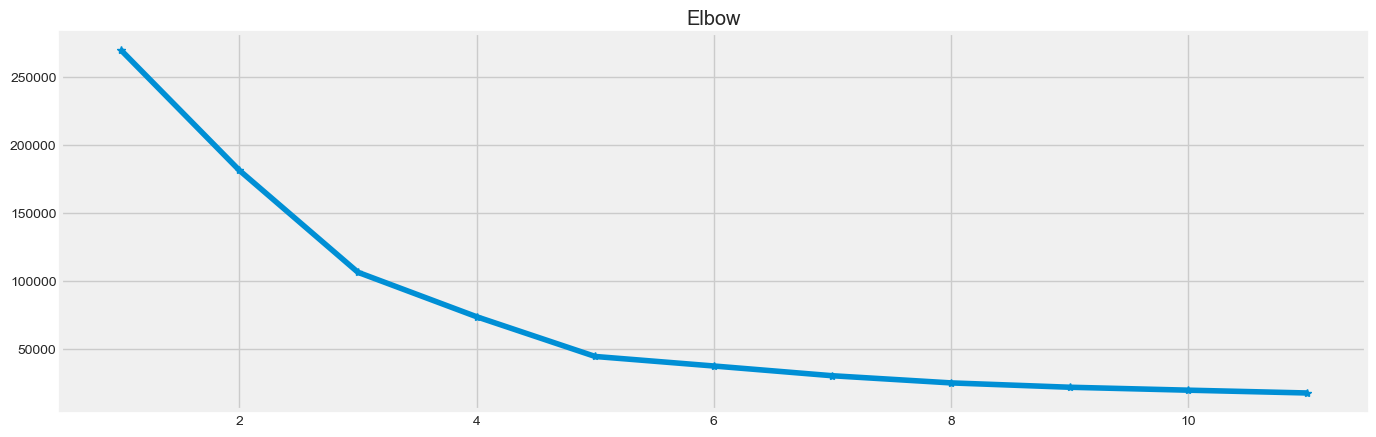

In [32]:
wss = []

for i in range(1,12):
    km = KMeans(n_clusters = i, random_state = 101)
    km.fit(x)
    wss.append(km.inertia_)
    
plt.figure(figsize = (15,5), dpi = 100)
plt.plot(range(1,12),wss,marker = '*')
plt.title('Elbow')

plt.show();


In [33]:
km = KMeans(n_clusters = 5, random_state = 105)
km.fit(x)
y = km.predict(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=105, tol=0.0001, verbose=0)

In [34]:
km.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

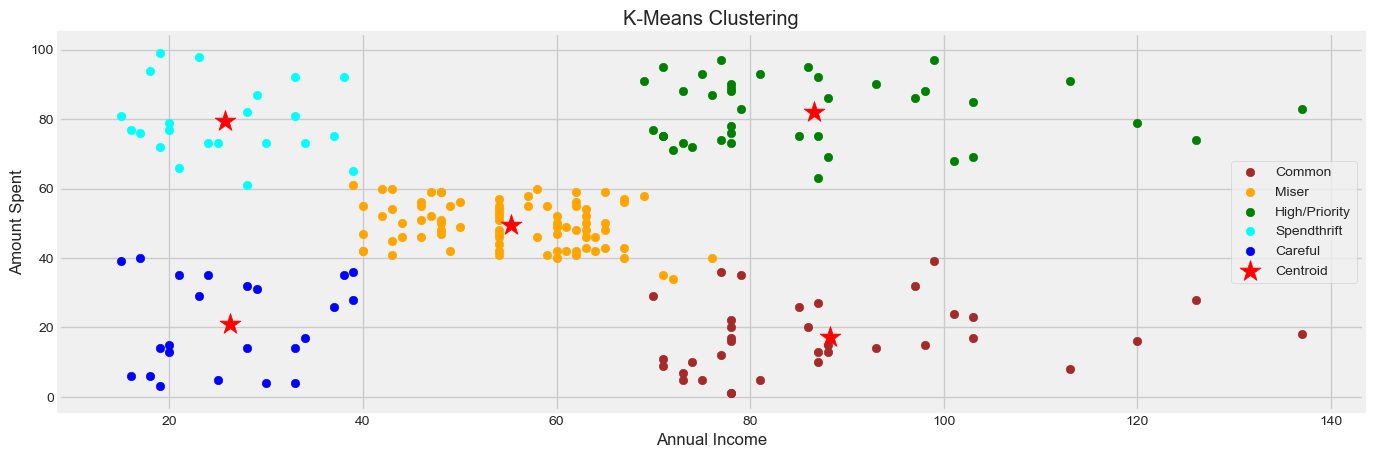

In [35]:
plt.figure(figsize = (15,5), dpi = 100)

plt.scatter(x[y == 0,0], x[y == 0,1], color = 'brown', label = 'Common')
plt.scatter(x[y == 1,0], x[y == 1,1], color = 'orange', label = 'Miser')
plt.scatter(x[y == 2,0], x[y == 2,1], color = 'green', label = 'High/Priority')
plt.scatter(x[y == 3,0], x[y == 3,1], color = 'aqua', label = 'Spendthrift')
plt.scatter(x[y == 4,0], x[y == 4,1], color = 'blue', label = 'Careful')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker = '*', s = 250, c = 'red' , label = 'Centroid')

plt.xlabel('Annual Income')
plt.ylabel('Amount Spent')
plt.title('K-Means Clustering')
plt.legend(loc = 'best')
plt.show();

In [36]:
## Assign new data point to the cluster


i = np.array([10,10]).reshape(1,-1)

i

km.predict(i)

array([[10, 10]])

array([4])

In [37]:
i = np.array([10,10, 30,80, 20,100]).reshape(3,2)

i

km.predict(i)

array([[ 10,  10],
       [ 30,  80],
       [ 20, 100]])

array([4, 3, 3])

## Hierarchical Clustering(HAC)

In [38]:
from sklearn.cluster import AgglomerativeClustering

In [39]:
agg = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
agg.fit(x)
y_agg = agg.fit_predict(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

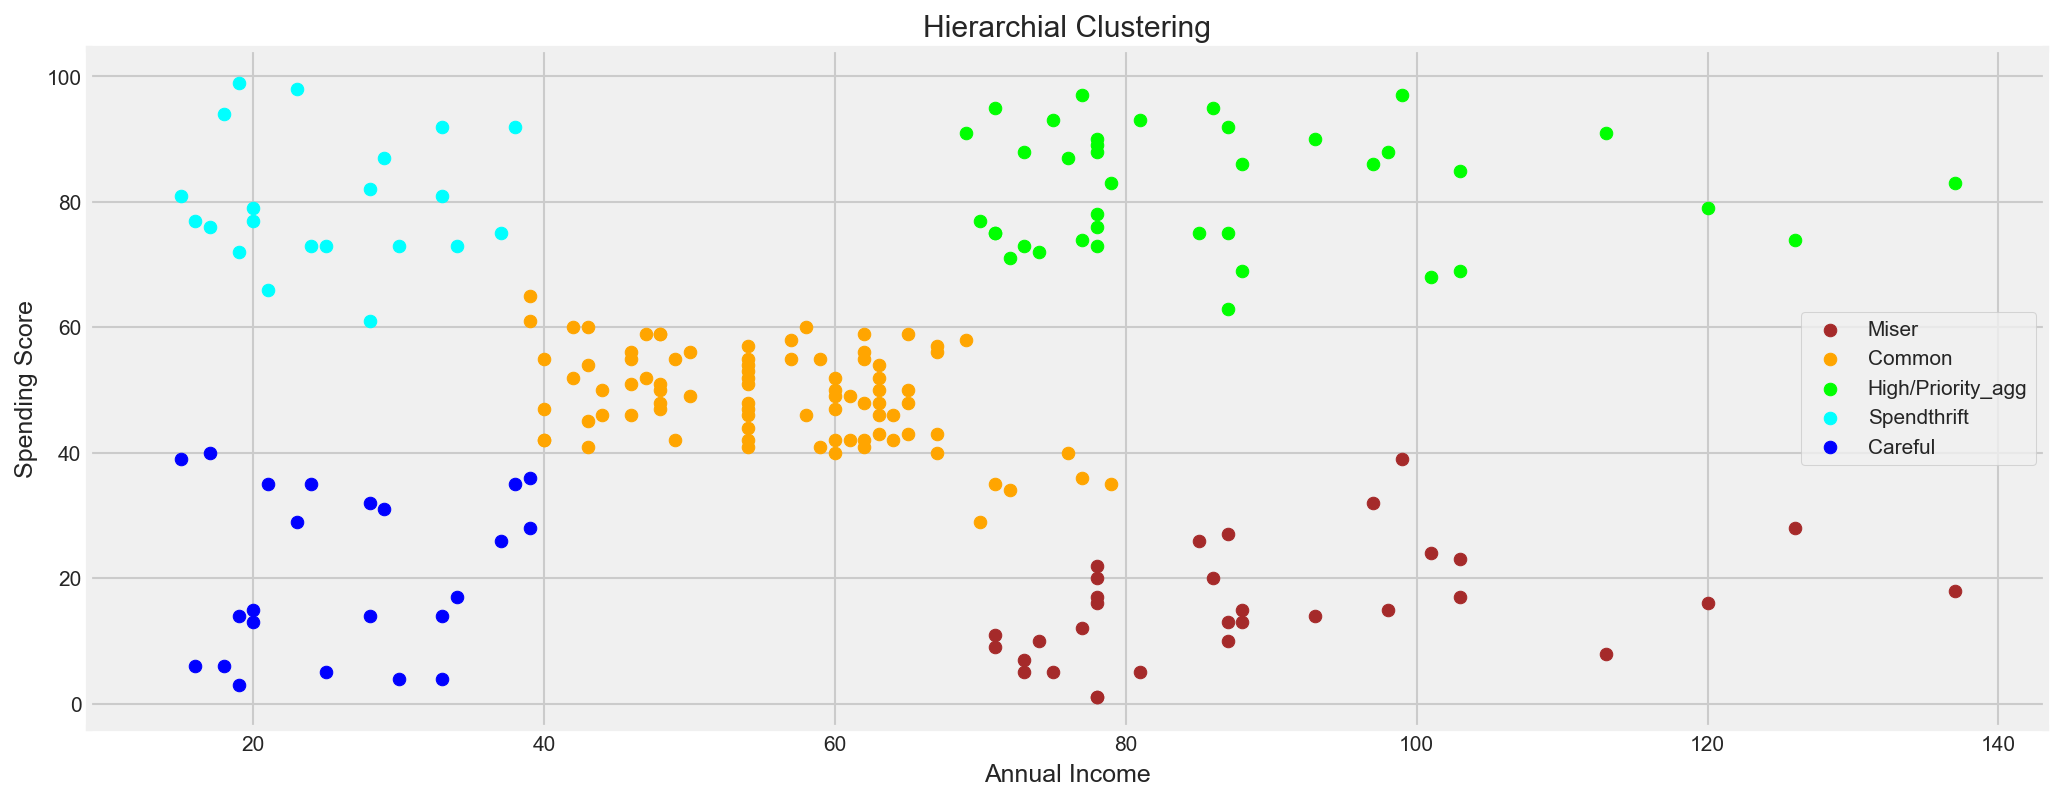

In [40]:
plt.figure(figsize=(15,6), dpi = 150)

plt.scatter(x[y_agg == 0, 0], x[y_agg == 0, 1], color = 'brown', label = 'Miser')
plt.scatter(x[y_agg == 1, 0], x[y_agg == 1, 1], color = 'orange', label = 'Common')
plt.scatter(x[y_agg == 2, 0], x[y_agg == 2, 1], color = 'lime', label = 'High/Priority_agg')
plt.scatter(x[y_agg == 3, 0], x[y_agg == 3, 1], color = 'aqua', label = 'Spendthrift')
plt.scatter(x[y_agg == 4, 0], x[y_agg == 4, 1], color = 'blue', label = 'Careful')

#plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],marker = '*', s = 250, c = 'red', label = 'centroid')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Hierarchial Clustering')
plt.legend(loc = 'best')
plt.show();

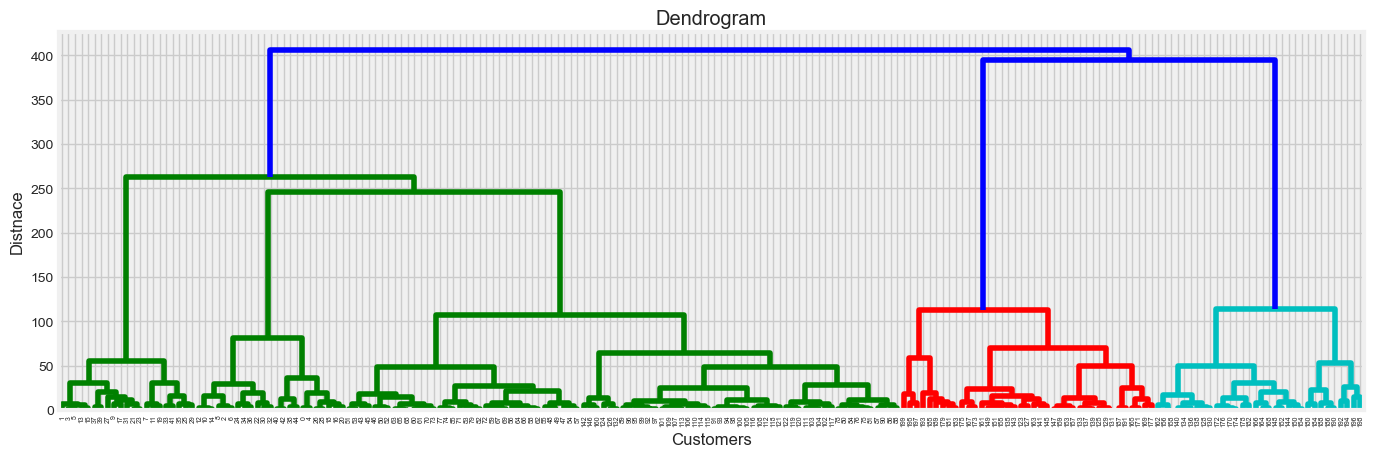

In [41]:
# Plot dendrogram

import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,5), dpi = 100)
dend = sch.dendrogram(sch.linkage(x,method = 'ward'))


plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distnace')

plt.show();

In [44]:
df.iloc[:,3:5].head(30).values

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72],
       [19, 14],
       [19, 99],
       [20, 15],
       [20, 77],
       [20, 13],
       [20, 79],
       [21, 35],
       [21, 66],
       [23, 29],
       [23, 98],
       [24, 35],
       [24, 73],
       [25,  5],
       [25, 73],
       [28, 14],
       [28, 82],
       [28, 32],
       [28, 61],
       [29, 31],
       [29, 87]], dtype=int64)

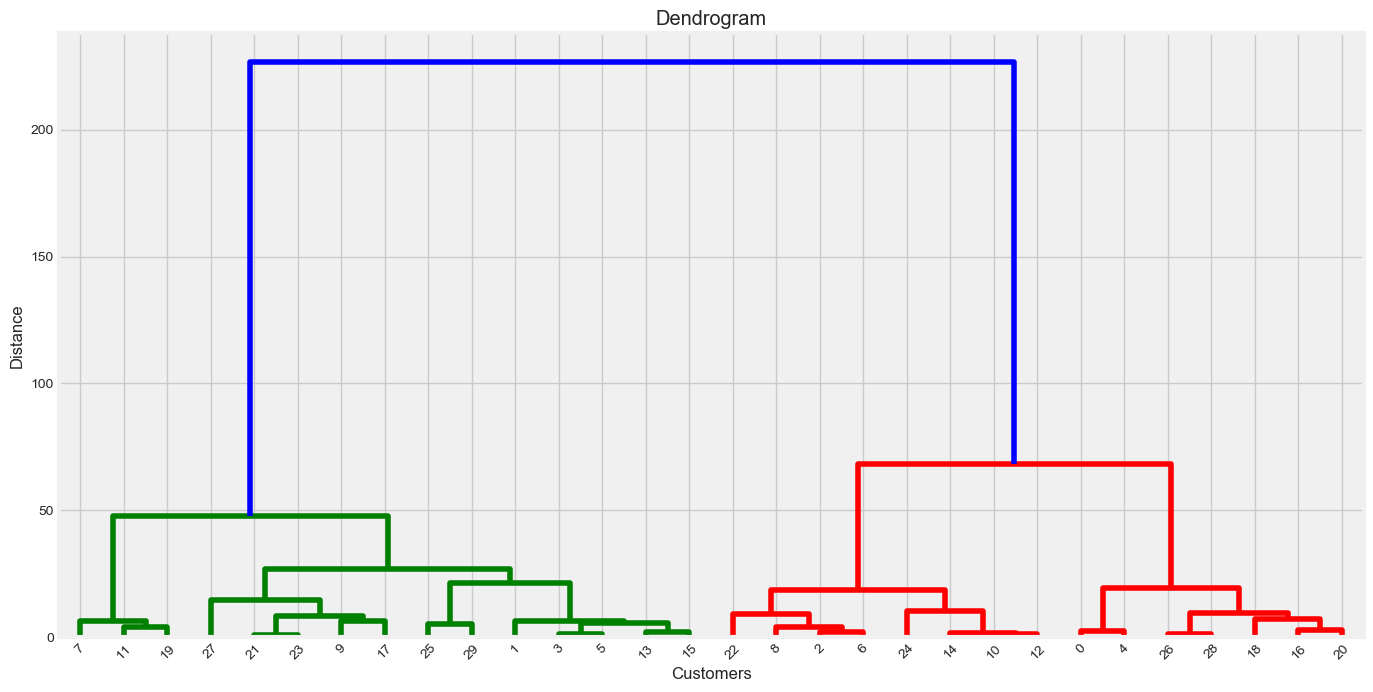

In [51]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15,8), dpi = 100)
dend = sch.dendrogram(sch.linkage(df.iloc[:,3:5].head(30).values, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Distance')

plt.show();

In [71]:
data = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\MachineLearning\Amaresh sir\Clustering\Mall_Customers_data.csv")

In [73]:
x = data.iloc[:,2:5].values
x

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [74]:
km= KMeans(n_clusters = 5, random_state = 200)
km.fit(x)
y = km.fit_predict(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=200, tol=0.0001, verbose=0)

In [75]:
km.cluster_centers_

array([[25.52173913, 26.30434783, 78.56521739],
       [43.08860759, 55.29113924, 49.56962025],
       [32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348]])

In [76]:
labels = km.labels_
centroids = km.cluster_centers_

In [77]:
data['labels'] =  km.labels_
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Annual Income (k$)'],
    z= data['Spending Score (1-100)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Annual Income'),
            zaxis = dict(title  = 'Spending Score')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)